In [1]:
import pandas as pd

df = pd.read_csv('/kaggle/input/food-1/ifood_df.csv')

columns = df.columns.tolist()

data_types = df.dtypes

info_dict = dict(zip(columns, data_types))

for column, data_type in info_dict.items():
    print(f"Column: {column}, Data Type: {data_type}")


Column: Income, Data Type: float64
Column: Kidhome, Data Type: int64
Column: Teenhome, Data Type: int64
Column: Recency, Data Type: int64
Column: MntWines, Data Type: int64
Column: MntFruits, Data Type: int64
Column: MntMeatProducts, Data Type: int64
Column: MntFishProducts, Data Type: int64
Column: MntSweetProducts, Data Type: int64
Column: MntGoldProds, Data Type: int64
Column: NumDealsPurchases, Data Type: int64
Column: NumWebPurchases, Data Type: int64
Column: NumCatalogPurchases, Data Type: int64
Column: NumStorePurchases, Data Type: int64
Column: NumWebVisitsMonth, Data Type: int64
Column: AcceptedCmp3, Data Type: int64
Column: AcceptedCmp4, Data Type: int64
Column: AcceptedCmp5, Data Type: int64
Column: AcceptedCmp1, Data Type: int64
Column: AcceptedCmp2, Data Type: int64
Column: Complain, Data Type: int64
Column: Z_CostContact, Data Type: int64
Column: Z_Revenue, Data Type: int64
Column: Response, Data Type: int64
Column: Age, Data Type: int64
Column: Customer_Days, Data Type: 

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
print(df.isnull().sum())
df.drop_duplicates(inplace=True)

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [6]:
descriptive_stats = df.describe()
print(descriptive_stats)

              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2021.000000  2021.000000  2021.000000  2021.000000  2021.000000   
mean    51687.258783     0.443345     0.509649    48.880752   306.492331   
std     20713.046401     0.536196     0.546393    28.950917   337.603877   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35416.000000     0.000000     0.000000    24.000000    24.000000   
50%     51412.000000     0.000000     0.000000    49.000000   178.000000   
75%     68274.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2021.000000      2021.000000      2021.000000       2021.000000   
mean     26.364671       166.059871        37.603662         27.268679   
std      39.776518       219.869126        54.892196         41.575454   
min       0.000000 

In [25]:
average_purchase_value = df['MntTotal'].mean()
frequency_of_purchases = len(df) / df['Recency'].max()

median_income = df['Income'].median()

std_recency = df['Recency'].std()

print("Descriptive Statistics:")
print(descriptive_stats)
print("\Average Purchase Value")
print(average_purchase_value)
print("\Frequency of purchases")
print(frequency_of_purchases)
print("\nMedian Income:", median_income)
print("Standard Deviation of Recency:", std_recency)

Descriptive Statistics:
              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2021.000000  2021.000000  2021.000000  2021.000000  2021.000000   
mean    51687.258783     0.443345     0.509649    48.880752   306.492331   
std     20713.046401     0.536196     0.546393    28.950917   337.603877   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35416.000000     0.000000     0.000000    24.000000    24.000000   
50%     51412.000000     0.000000     0.000000    49.000000   178.000000   
75%     68274.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2021.000000      2021.000000      2021.000000       2021.000000   
mean     26.364671       166.059871        37.603662         27.268679   
std      39.776518       219.869126        54.892196         41.57545

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


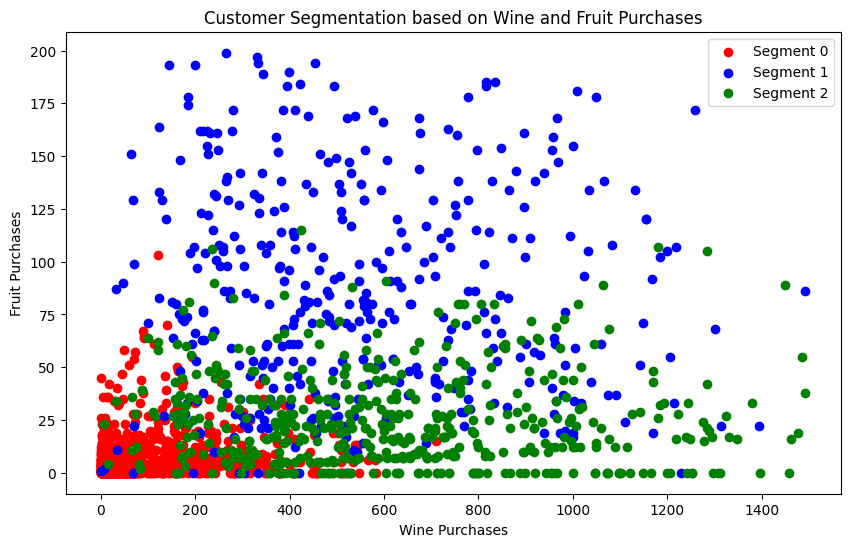

In [17]:

features = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))

plt.scatter(df[df['Segment'] == 0]['MntWines'], df[df['Segment'] == 0]['MntFruits'], color='red', label='Segment 0')
plt.scatter(df[df['Segment'] == 1]['MntWines'], df[df['Segment'] == 1]['MntFruits'], color='blue', label='Segment 1')
plt.scatter(df[df['Segment'] == 2]['MntWines'], df[df['Segment'] == 2]['MntFruits'], color='green', label='Segment 2')

plt.xlabel('Wine Purchases')
plt.ylabel('Fruit Purchases')
plt.title('Customer Segmentation based on Wine and Fruit Purchases')
plt.legend()
plt.show()

In [16]:
segment_means = df.groupby('Segment').mean()

print("Segment Means:")
print(segment_means)


Segment Means:
               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Segment                                                                       
0        38225.325480  0.698080  0.553229  48.595986   88.404887   6.287958   
1        73804.413965  0.062344  0.271820  48.561097  546.593516  84.773067   
2        65523.537975  0.149789  0.605485  49.839662  630.643460  25.491561   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Segment                                                                     
0              34.165794         8.536649          6.249564     17.431937   
1             456.765586       118.201995         87.516209     83.586035   
2             239.008439        39.694093         27.118143     74.411392   

         ...  marital_Together  marital_Widow  education_2n Cycle  \
Segment  ...                                                        
0        ...          0.251309       0.028796            0.095113

In [27]:
def segment_recommendations(segment_means):
    recommendations = {}
    
    for segment, means in segment_means.iterrows():
        segment_recommendation = ""
        
        if means['MntWines'] > 500 and means['MntMeatProducts'] > 300:
            segment_recommendation += "🍷🥩 Target these customers with promotions on premium wines and gourmet meat products. 🥩🍷"
        elif means['MntFruits'] > 50 and means['MntFishProducts'] > 50:
            segment_recommendation += "🍏🐟 Focus on offering a variety of fresh fruits and seafood products, and emphasize healthy living. 🍏🐟"

        elif means['Income'] > 70000:
            segment_recommendation += "💰 Offer exclusive premium memberships with added benefits such as concierge services and priority access to new products or services. 💰"
        elif means['Age'] > 50:
            segment_recommendation += "👵👴 Cater to the needs of mature customers by providing products and services tailored to their age group. Consider offering senior discounts and organizing social events for seniors. 👵👴"
        elif means['NumWebPurchases'] > 5:
            segment_recommendation += "🖥️ Encourage online shopping by offering special discounts and promotions for web purchases. Enhance the user experience of your online platform to make it more convenient and user-friendly. 🖥️"
        elif means['AcceptedCmpOverall'] > 0.5:
            segment_recommendation += "💡 Leverage the positive response to marketing campaigns by offering exclusive deals and promotions to boost engagement further. 💡"
        elif means['NumDealsPurchases'] > 3:
            segment_recommendation += "🛍️ Engage bargain-hunters with limited-time deals and discounts, encouraging repeat purchases and brand loyalty. 🛍️"
        elif means['NumWebVisitsMonth'] < 5:
            segment_recommendation += "🌐 Enhance the online shopping experience for customers with fewer web visits by optimizing website usability and offering personalized recommendations. 🌐"
        elif means['NumCatalogPurchases'] > 2:
            segment_recommendation += "📦 Offer a comprehensive catalog of products to cater to customers who prefer browsing through physical catalogs. Provide discounts and special offers for catalog purchases to incentivize sales. 📦"
        elif means['NumStorePurchases'] > 3:
            segment_recommendation += "🏬 Create an inviting in-store shopping experience with personalized assistance and product demonstrations. Implement loyalty programs for in-store purchases to encourage repeat visits. 🏬"
        elif means['MntTotal'] > 800:
            segment_recommendation += "🎁 Recognize and reward high-spending customers with exclusive perks and privileges. Consider offering VIP memberships or tiered loyalty programs with escalating benefits based on spending levels. 🎁"
        
        else:
            segment_recommendation += "🎁 Provide personalized recommendations based on individual preferences, as these customers have diverse spending patterns. 🎁"
        
        
        
        recommendations[segment] = segment_recommendation.strip()
    
    return recommendations

recommendations = segment_recommendations(segment_means)

for segment, recommendation in recommendations.items():
    print(f"\033[1mRecommendations for Segment {segment}:\033[0m \n{recommendation}\n")


Recommendations for Segment 0: 
🏬 Create an inviting in-store shopping experience with personalized assistance and product demonstrations. Implement loyalty programs for in-store purchases to encourage repeat visits. 🏬

Recommendations for Segment 1: 
🍷🥩 Target these customers with promotions on premium wines and gourmet meat products. 🥩🍷

Recommendations for Segment 2: 
👵👴 Cater to the needs of mature customers by providing products and services tailored to their age group. Consider offering senior discounts and organizing social events for seniors. 👵👴

